## Algoritmo de Clustering Jerárquico

El clustering jerárquico es un método de agrupamiento que busca construir una jerarquía de clusters, que tambien se basa en distancias, puede ser aglomerativo (agrupando po similitud) o divisivo (separando por disimilitud)

### Objetivo
Agrupar datos en una estructura jerárquica, donde los clusters se anidan unos dentro de otros, formando una estructura en forma de árbol llamada dendrograma.

### Conceptos Claves:
- **Observaciones**: Cada individuo del conjunto de datos debe estar contenido en algún cluster y no pertenece a más de un cluster.
- **Distancia Euclidiana**: Métrica comúnmente utilizada para medir la distancia entre puntos en el espacio.
        $$
        d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
        $$
- **Dendrograma**: Un diagrama en forma de árbol que muestra las relaciones de agrupamiento entre las observaciones.
- **Raíz**: El punto de inicio del dendrograma que representa el cluster que contiene todas las observaciones.
- **Ramas**: Las líneas que conectan los clusters en el dendrograma, mostrando cómo se agrupan las observaciones.
- **Hojas**: Los puntos finales del dendrograma que representan las observaciones individuales.
- **Métodos de enlace**: Estrategias para calcular la distancia entre clusters, como enlace sencillo, enlace completo y enlace promedio.

        - Linkage sencillo: calcula la distancia entre dos clusters como la distancia mínima entre cualquier par de puntos, uno de cada cluster.

        - Linkage completo: calcula la distancia entre dos clusters se define como la distancia máxima entre cualquier par de puntos, uno de cada cluster.

        - Linkage promedio:  Este método calcula la distancia entre dos clusters como el promedio de todas las distancias entre pares de puntos, uno de cada cluster.
        
### Variables requeridas
Se requieren variables cuantitativas y estandarizadas para calcular distancias de manera efectiva.

### Algoritmo
1. **Cálculo de la matriz de distancias**: Calcular la distancia entre cada par de observaciones.
2. **Funciones de enlace**: Seleccionar una función de enlace para determinar cómo se mide la distancia entre clusters. Las funciones de enlace influyen en la forma en que se construye el dendrograma:
   - **Enlace sencillo (single linkage)**: La distancia entre dos clusters es la distancia mínima entre cualquier par de puntos, uno de cada cluster.
   - **Enlace completo (complete linkage)**: La distancia entre dos clusters es la distancia máxima entre cualquier par de puntos, uno de cada cluster.
   - **Enlace promedio (average linkage)**: La distancia entre dos clusters es el promedio de todas las distancias entre pares de puntos, uno de cada cluster.
   - **Enlace de centroide (centroid linkage)**: La distancia entre dos clusters es la distancia entre los centroides de los clusters.
3. **Fusión de clusters**: Comenzar con cada observación como un cluster individual y fusionar los dos clusters más cercanos en cada paso, según la función de enlace seleccionada.
4. **Actualización de la matriz de distancias**: Actualizar la matriz de distancias para reflejar las nuevas distancias entre los clusters fusionados.
5. **Repetición**: Repetir el paso 3 hasta que todos los puntos estén en un solo cluster o se alcance el número deseado de clusters.

### Evaluación
- **Dendrograma**: Visualizar el dendrograma para determinar el número óptimo de clusters. El punto donde se corta el dendrograma determina los clusters finales.
- **Silhouette Score**: Mide la calidad del agrupamiento comparando la distancia media entre puntos dentro del mismo cluster y la distancia media a puntos en el cluster más cercano.

### Selección del número de clusters
- **Dendrograma**: Analizar el dendrograma y buscar el punto donde la distancia entre clusters aumenta significativamente, lo que indica el número óptimo de clusters.
- **Silhouette Score**: Evaluar el Silhouette Score para diferentes números de clusters y seleccionar el que maximice este valor.

In [2]:
# Importar librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn import  preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
%matplotlib inline  
# magic command de Jupyter Notebook que permite que las visualizaciones de matplotlib se muestren directamente en el notebook

In [6]:
# Carga de datos
from sklearn.datasets import load_breast_cancer

In [7]:
# Exploración del dataset
data = pd.DataFrame(load_breast_cancer().data,columns = load_breast_cancer().feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Normalizo los datos
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)
data_normalized_df = pd.DataFrame(data_normalized, columns=data.columns)
data_normalized_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


C:\Users\csolis\AppData\Local\Temp\ipykernel_18236\440841419.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_normalized_df[x] , bins = 15)
C:\Users\csolis\AppData\Local\Temp\ipykernel_18236\440841419.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_normalized_df[x] , bins = 15)


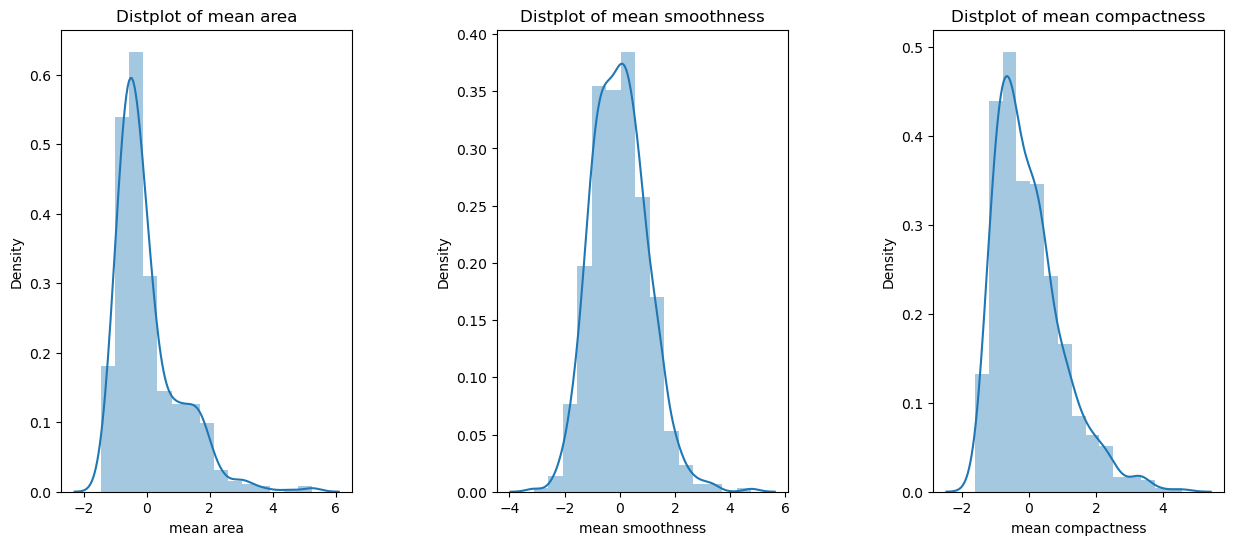

In [9]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['mean area' , 'mean smoothness' , 'mean compactness']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(data_normalized_df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

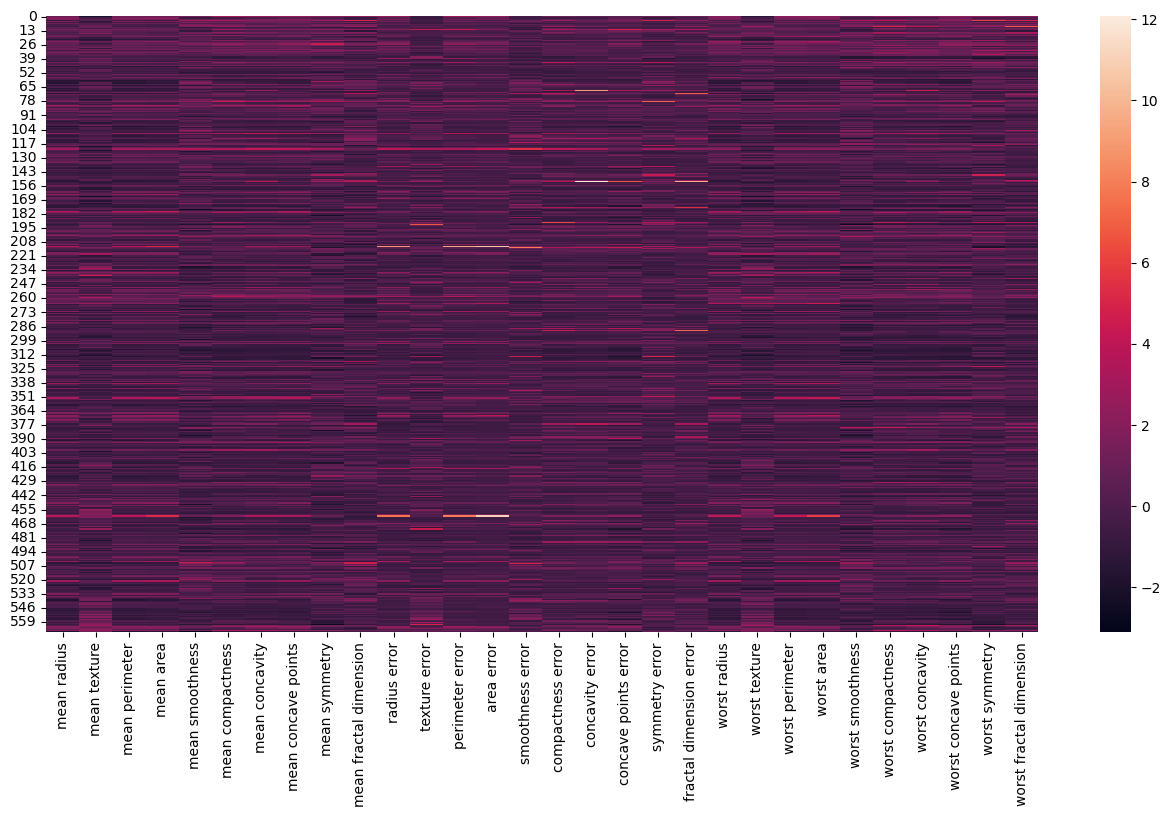

In [13]:
plt.figure(1, figsize = (16 ,8))
sns.heatmap(data_normalized_df)
plt.show()

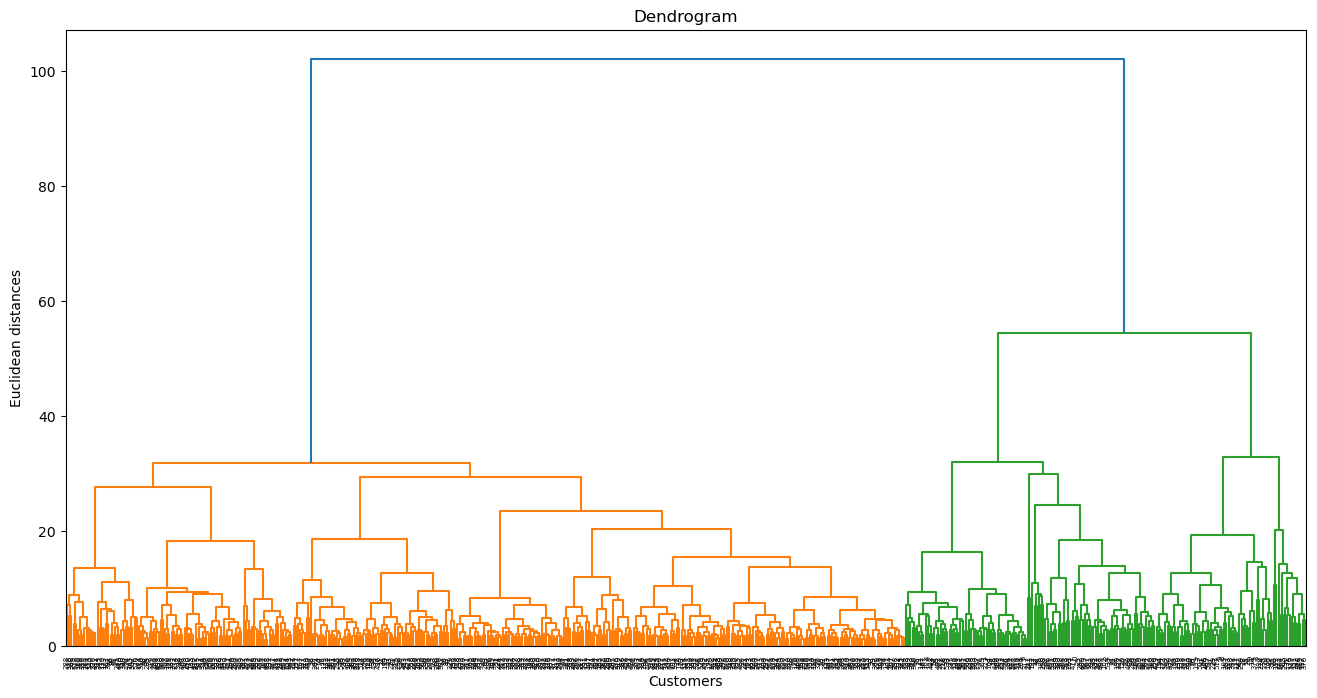

In [14]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(data_normalized_df, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()